In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Flatten

In [ ]:
#preparing dependent and independent features
def prepare_data(timeseries_data, n_features):
  X,y = [],[]
  for i in range(len(timeseries_data)):
    end_ix = i + n_features
    if end_ix > len(timeseries_data)-1:
      break
    seq_x,seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X),np.array(y)

In [ ]:
#defining input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
n_steps=3
X,y = prepare_data(timeseries_data,n_steps)

In [ ]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [ ]:
X.shape

(6, 3)

In [ ]:
#reshaping X
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

Building LSTM Model

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps,n_features)))
model.add(LSTM(50,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#fit model
model.fit(X,y,epochs = 300)


Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 32539.7441
Epoch 2/300
1/1 [==============================] - 0s 25ms/step - loss: 31597.8281
Epoch 3/300
1/1 [==============================] - 0s 22ms/step - loss: 30814.0449
Epoch 4/300
1/1 [==============================] - 0s 21ms/step - loss: 30172.2676
Epoch 5/300
1/1 [==============================] - 0s 17ms/step - loss: 29572.1484
Epoch 6/300
1/1 [==============================] - 0s 23ms/step - loss: 29042.7246
Epoch 7/300
1/1 [==============================] - 0s 20ms/step - loss: 28499.9453
Epoch 8/300
1/1 [==============================] - 0s 19ms/step - loss: 27882.8184
Epoch 9/300
1/1 [==============================] - 0s 19ms/step - loss: 27222.3379
Epoch 10/300
1/1 [==============================] - 0s 17ms/step - loss: 26578.3926
Epoch 11/300
1/1 [==============================] - 0s 15ms/step - loss: 25959.0996
Epoch 12/300
1/1 [==============================] - 0s 19ms/step - loss: 25326.3926
Epo

Predicting for next 10 days

In [ ]:
x_input = np.array([187,196,210])
temp_input = list(x_input)
lst_output = []
n_steps = 3
i = 0
while(i<10):
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape((1,n_steps,n_features))
        yhat = model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,n_features))
        yhat = model.predict(x_input,verbose =0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
print(lst_output)

[222.81514]
1 day input [196.         210.         222.81513977]
1 day output [[233.90158]]
2 day input [210.         222.81513977 233.90158081]
2 day output [[246.23326]]
3 day input [222.81514 233.90158 246.23326]
3 day output [[258.16904]]
4 day input [233.90158 246.23326 258.16904]
4 day output [[269.62982]]
5 day input [246.23326 258.16904 269.62982]
5 day output [[281.41782]]
6 day input [258.16904 269.62982 281.41782]
6 day output [[293.12115]]
7 day input [269.62982 281.41782 293.12115]
7 day output [[304.7588]]
8 day input [281.41782 293.12115 304.7588 ]
8 day output [[316.55115]]
9 day input [293.12115 304.7588  316.55115]
9 day output [[328.4182]]
[222.81514, 233.90158, 246.23326, 258.16904, 269.62982, 281.41782, 293.12115, 304.7588, 316.55115, 328.4182]


In [ ]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [ ]:
len(timeseries_data)

9

In [ ]:
lst_output

[222.81514,
 233.90158,
 246.23326,
 258.16904,
 269.62982,
 281.41782,
 293.12115,
 304.7588,
 316.55115,
 328.4182]

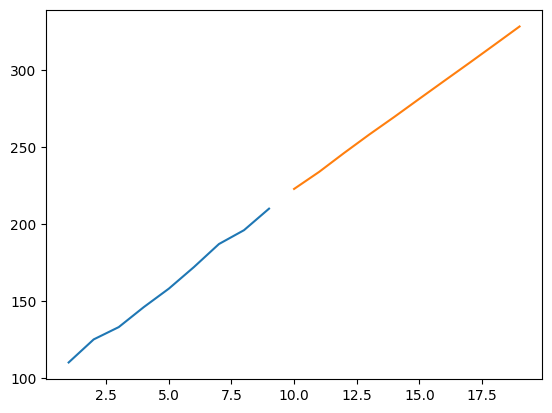

In [ ]:
import matplotlib.pyplot as plt
day_new=np.arange(1,10)
day_pred=np.arange(10,20)
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)